In [3]:
import os
import tarfile
import pandas as pd
tar = tarfile.open("C:/Users/Admin/Dropbox/PC/Documents/ML_scikit-learn/datasets/housing/housing.tgz")
tar.extractall("C:/Users/Admin/Dropbox/PC/Documents/ML_scikit-learn/datasets/housing/")
tar.close()

In [4]:
house_path = "C:/Users/Admin/Dropbox/PC/Documents/ML_scikit-learn/datasets/housing/housing.csv"
housing = pd.read_csv(house_path)
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


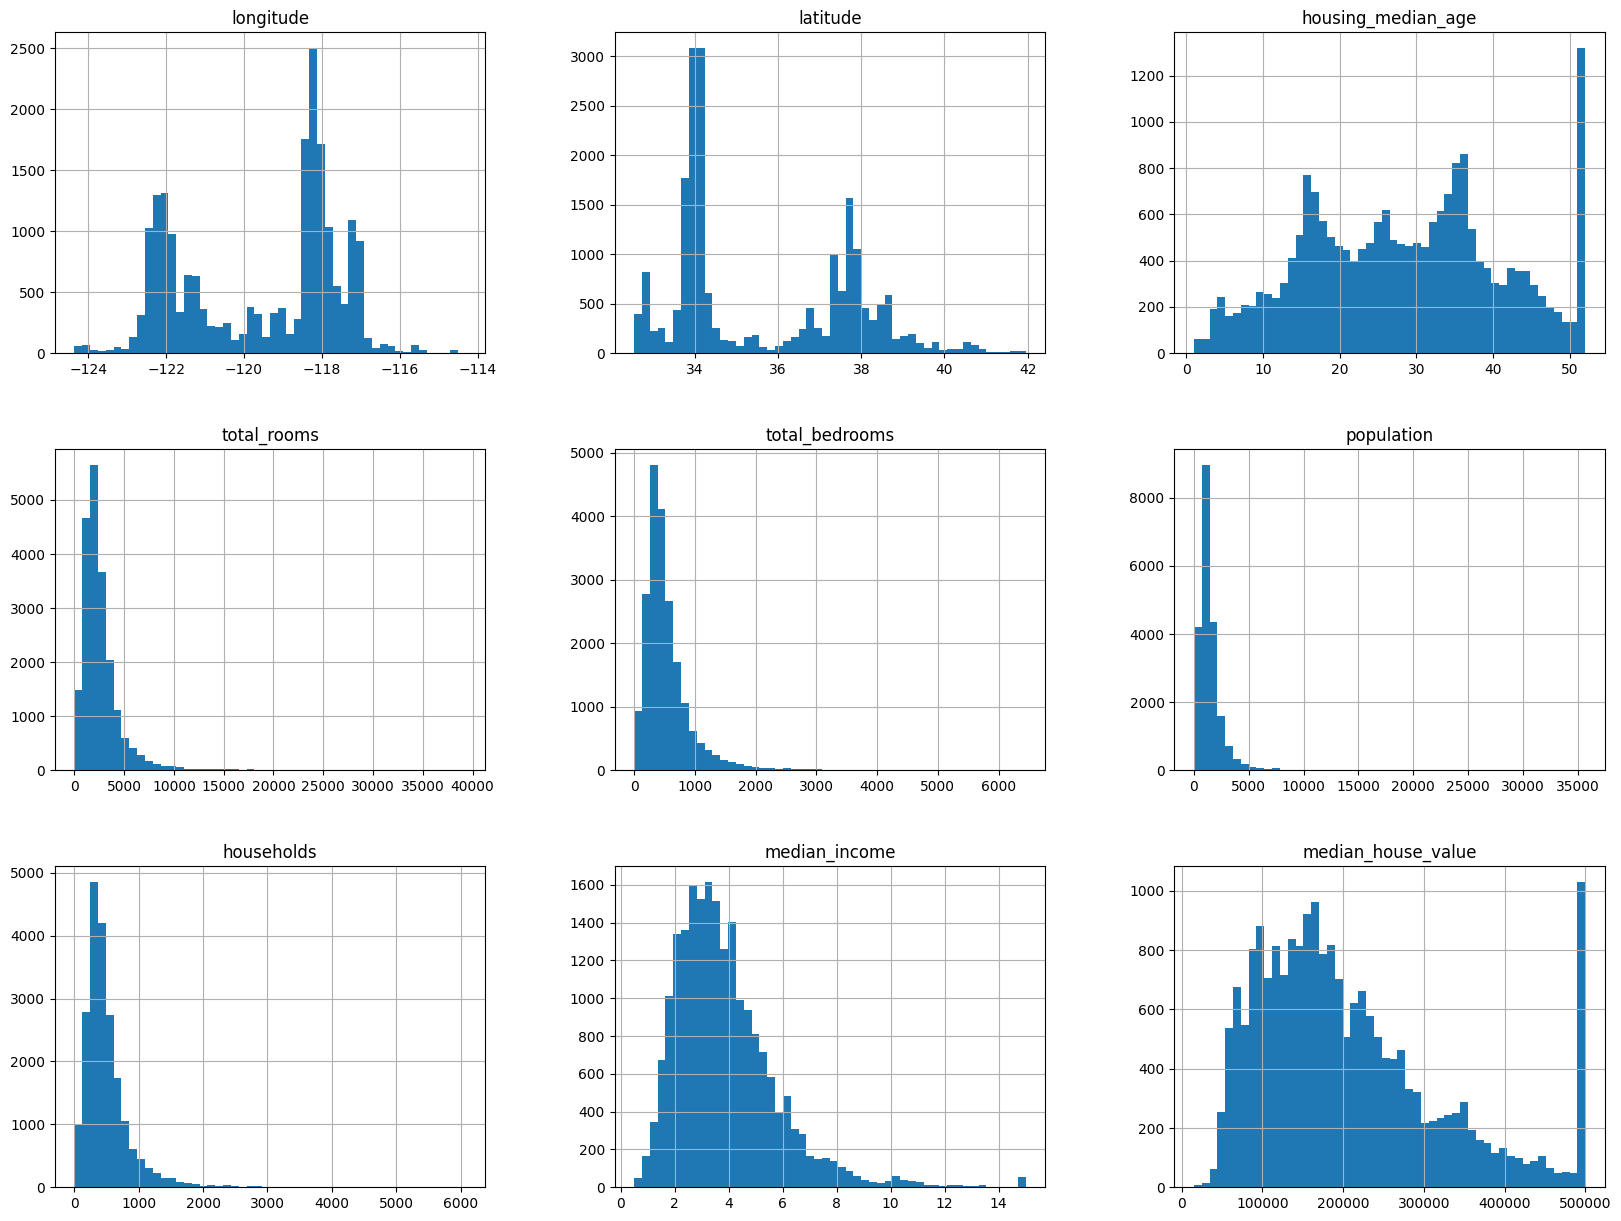

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9579,-120.50,37.37,18.0,8606.0,1678.0,5303.0,1644.0,2.4012,79700.0,INLAND
19924,-119.33,36.32,20.0,2025.0,328.0,1039.0,346.0,3.5313,82800.0,INLAND
1720,-122.33,37.99,4.0,3999.0,1079.0,1591.0,887.0,3.9110,112500.0,NEAR BAY
17282,-119.73,34.42,25.0,2024.0,312.0,907.0,335.0,5.4127,392800.0,NEAR OCEAN
12378,-116.46,33.78,25.0,1137.0,414.0,604.0,240.0,1.3801,55000.0,INLAND


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1316,-121.80,38.00,34.0,2738.0,475.0,1316.0,459.0,3.5368,122500.0,INLAND
2469,-119.97,36.57,17.0,1497.0,308.0,1425.0,247.0,2.0313,69400.0,INLAND
10760,-117.87,33.62,15.0,2209.0,275.0,735.0,274.0,15.0001,500001.0,<1H OCEAN
5663,-118.28,33.73,52.0,2085.0,588.0,1767.0,516.0,2.1935,243200.0,NEAR OCEAN
18860,-122.22,38.12,15.0,14125.0,2344.0,6456.0,2147.0,5.1014,179500.0,NEAR BAY


In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
#methode d'echantillonage purement aleatoire
test_set['median_income'].value_counts()/len(test_set)

4.0000    0.004118
3.8750    0.002665
2.8750    0.002665
3.5000    0.002422
1.6250    0.002422
            ...   
4.0229    0.000242
5.7979    0.000242
5.2113    0.000242
2.2328    0.000242
3.5521    0.000242
Name: median_income, Length: 3412, dtype: float64

In [17]:
#methode d'echantillonage stratifié
housing['income_cat'] = pd.cut(housing["median_income"],
                              bins= [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels= [1,2,3,4,5])

<Axes: >

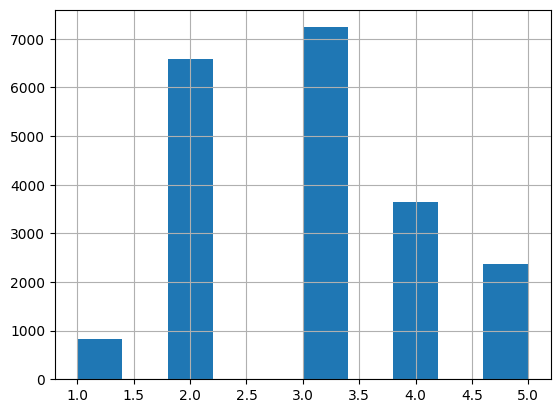

In [18]:
housing['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [22]:
housing['house_value_cat'] = pd.cut(housing["median_house_value"],
                              bins= [0., 100000, 200000, 300000, 400000, 500000., np.inf],
                              labels= [1,2,3,4,5,6])

<Axes: >

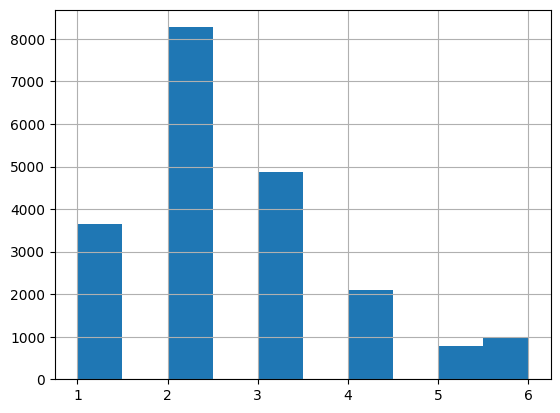

In [23]:
housing['house_value_cat'].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['house_value_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

    

In [25]:
strat_test_set["house_value_cat"].value_counts() / len(strat_test_set)

2    0.400921
3    0.235950
1    0.177326
4    0.101260
6    0.046754
5    0.037791
Name: house_value_cat, dtype: float64

In [26]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [27]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("house_value_cat", axis=1, inplace=True)

In [28]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

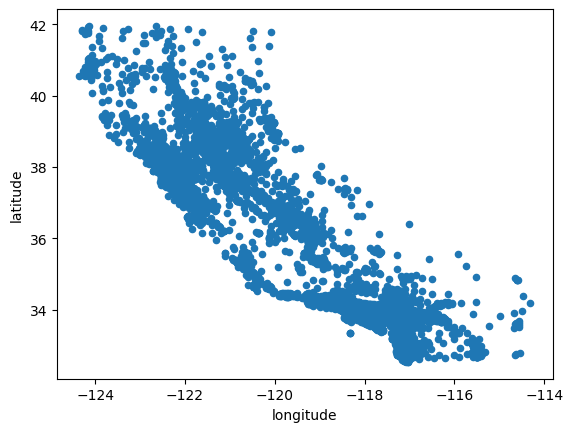

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

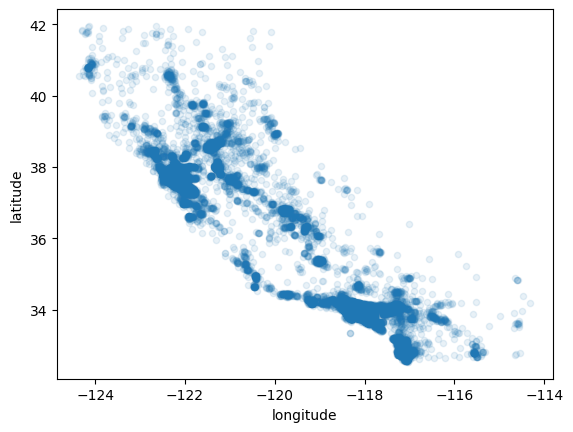

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

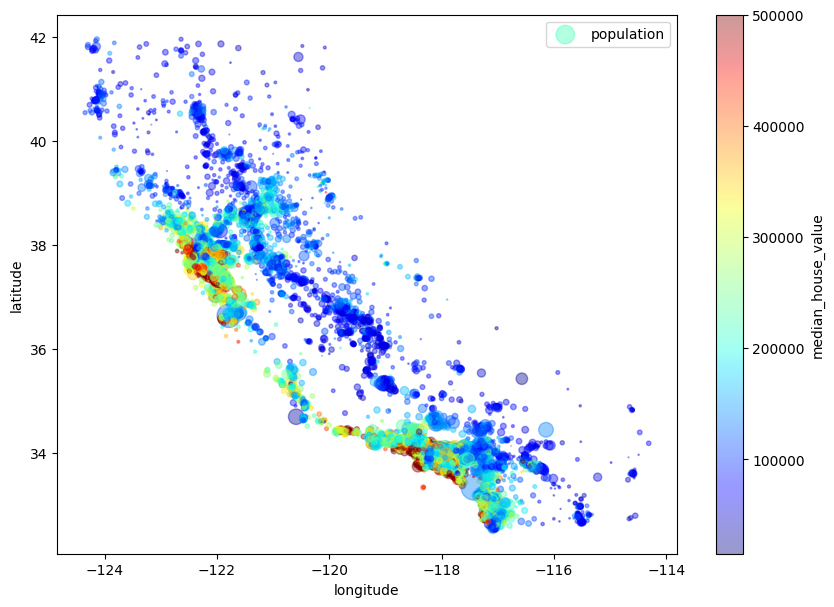

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label = "population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar= True,)

In [32]:
corr_matrix = housing.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6856\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688665
total_rooms           0.130915
housing_median_age    0.105910
households            0.064902
total_bedrooms        0.047413
population           -0.027584
longitude            -0.042339
latitude             -0.147469
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

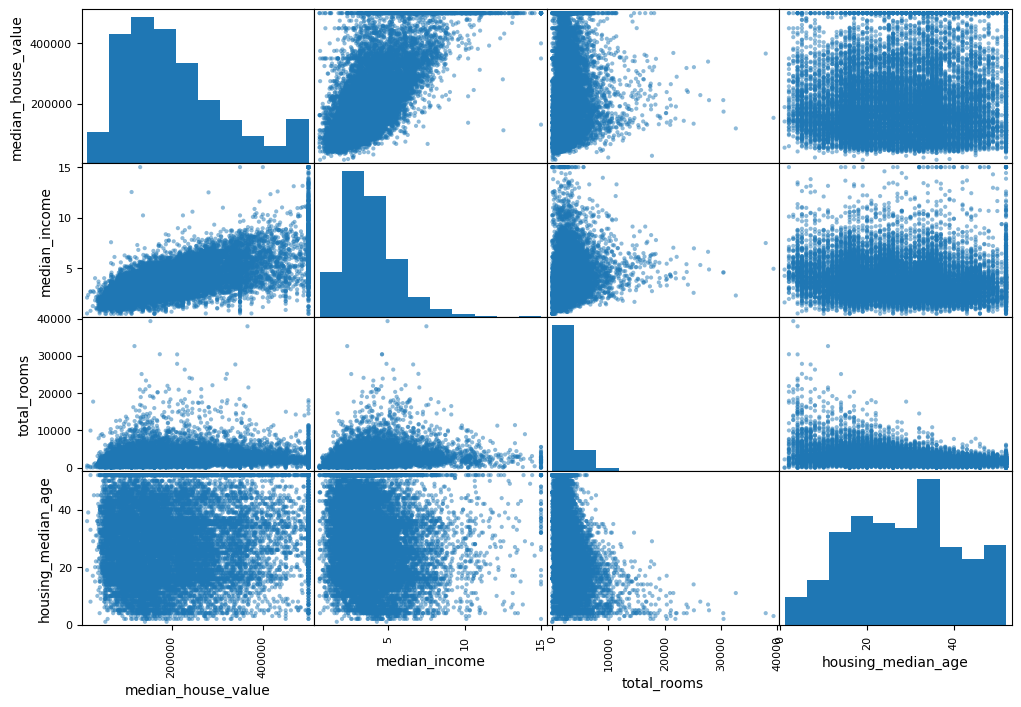

In [34]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

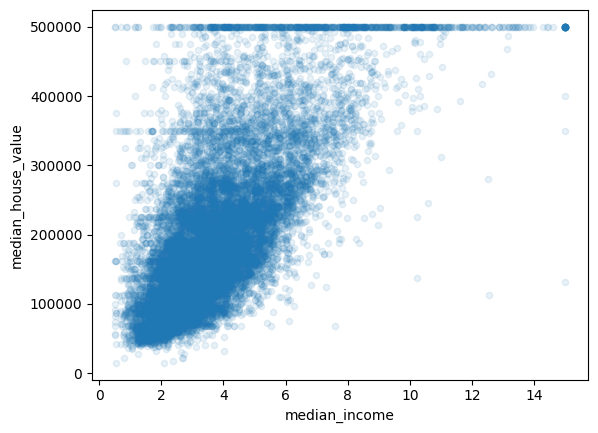

In [35]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [36]:
#combinaison entre certaine variables
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"] = housing["population"]/housing["households"]

In [37]:
corr_matrix = housing.corr()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6856\2491629433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688665
rooms_per_household          0.147583
total_rooms                  0.130915
housing_median_age           0.105910
households                   0.064902
total_bedrooms               0.047413
population_per_households   -0.022347
population                  -0.027584
longitude                   -0.042339
latitude                    -0.147469
bedrooms_per_room           -0.253626
Name: median_house_value, dtype: float64

In [39]:
#preparation des données pour l'algorithme d'apprentissage
#remplacement des valeur absente par la mediane
housing= strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)#creation d'une copy en eliminant la variable qualitative

In [41]:
imputer.fit(housing_num)#estimation des donnée absente

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_ #statistic_ est un paramettre d'instance publique d'avoir accès au hyperparametre

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.5   ,
        410.    ,    3.5333])

In [43]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.5   ,
        410.    ,    3.5333])

In [44]:
X = imputer.transform(housing_num)#la method transform permet de transformer un jeu de donnée

In [45]:
type(X)

numpy.ndarray

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [47]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13175,-120.95,36.47,52.0,1691.0,301.0,618.0,239.0,3.2292
7890,-118.07,33.88,16.0,4934.0,825.0,2668.0,810.0,5.7480
9496,-123.70,39.32,18.0,1652.0,352.0,711.0,292.0,3.1071
15657,-122.41,37.79,52.0,6016.0,2509.0,3436.0,2119.0,2.5166
12203,-117.12,33.61,2.0,2569.0,431.0,1232.0,388.0,4.3651


In [48]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13175 to 2116
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13175 to 2116
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13175,<1H OCEAN
7890,<1H OCEAN
9496,<1H OCEAN
15657,NEAR BAY
12203,<1H OCEAN
54,NEAR BAY
8938,<1H OCEAN
11339,<1H OCEAN
8348,<1H OCEAN
6287,<1H OCEAN


In [51]:
#cette methode est bonne pour des modalitée ordonné comme par exemple mauvais-moyen-bon-excellent 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
#Voici la meilleur methode pour ce projet
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
#transformateur sur mesure

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [58]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cats", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

In [59]:
#selectioner et entrainer le model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [60]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [230032. 268064. 195072. 371568. 181888.]


In [61]:
print("Etiquette", list(some_labels))

Etiquette [225000.0, 284200.0, 213200.0, 275000.0, 145600.0]


In [62]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68283.5552676108

In [63]:
#Decision tree model
#le modèle précedent a une erreur de 40% => une difference de 68283.555 entre la prediction et l'etiquette 
#donc un choisis un model plus complexe
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [65]:
#Amélioration et evaluation par validation croisé
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [66]:
def display_scores(scores):
    print("Scores:", scores)
    print("moyenne", scores.mean())
    print("Ecart-type", scores.std())

In [67]:
display_scores(tree_rmse_scores)

Scores: [68278.05298939 69504.57099019 75326.7291485  73892.27293131
 67955.99261615 68891.92493623 68987.26494308 71477.20113726
 71595.51886328 69120.694535  ]
moyenne 70503.0223090401
Ecart-type 2369.313815051534


In [68]:
lin_scores =  cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [69]:
display_scores(lin_rmse_scores)

Scores: [68451.9536188  63327.58468551 74182.25933222 70882.23617097
 67266.315612   68927.78670502 69392.49372673 68313.32656052
 69628.94319397 65532.35802286]
moyenne 68590.52576285935
Ecart-type 2779.4809244714315


In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [71]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18561.44959147295

In [72]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [73]:
display_scores(forest_rmse_scores)

Scores: [48074.78786356 45388.33866445 55486.02037421 53766.23224856
 48711.39170141 49105.21304049 49680.86299659 51068.56161371
 50701.47086995 47838.08501937]
moyenne 49982.09643922942
Ecart-type 2795.037508331558


In [75]:
#REGLER AVEC PRECISION LE MODELE

#RECHERCHE PAR QUADRILLAGE 
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [78]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62436.56874614636 {'max_features': 2, 'n_estimators': 3}
54856.917373826225 {'max_features': 2, 'n_estimators': 10}
52233.106093740615 {'max_features': 2, 'n_estimators': 30}
59768.96115647157 {'max_features': 4, 'n_estimators': 3}
52384.11663698373 {'max_features': 4, 'n_estimators': 10}
49992.84852431315 {'max_features': 4, 'n_estimators': 30}
59027.24726939905 {'max_features': 6, 'n_estimators': 3}
51858.42417062425 {'max_features': 6, 'n_estimators': 10}
49735.457707575144 {'max_features': 6, 'n_estimators': 30}
58617.21711869944 {'max_features': 8, 'n_estimators': 3}
51869.479323079155 {'max_features': 8, 'n_estimators': 10}
50074.590464494475 {'max_features': 8, 'n_estimators': 30}
62282.54459335864 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53741.52522095011 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60979.892974474984 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52111.27000659235 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [79]:
#meilleur valeur 49735.457707575144 {'max_features': 6, 'n_estimators': 30} meilleur que moyenne 49982.09643922942


In [80]:
#analyser les meilleurs modèles et leurs erreurs
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34971518e-02, 6.39527331e-02, 4.57035519e-02, 1.83503277e-02,
       1.56908358e-02, 1.77709693e-02, 1.59037702e-02, 3.25752551e-01,
       4.50555841e-02, 1.12259950e-01, 8.46215449e-02, 9.00106470e-03,
       1.63366141e-01, 3.18695315e-04, 2.71625575e-03, 6.03887299e-03])

In [88]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cats"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32575255069018955, 'median_income'),
 (0.1633661413985587, 'INLAND'),
 (0.11225995040850428, 'pop_per_hhold'),
 (0.08462154488107196, 'bedrooms_per_room'),
 (0.07349715175281962, 'longitude'),
 (0.06395273306539435, 'latitude'),
 (0.045703551946332494, 'housing_median_age'),
 (0.0450555840914447, 'rooms_per_hhold'),
 (0.018350327696759466, 'total_rooms'),
 (0.01777096927874562, 'population'),
 (0.015903770207600875, 'households'),
 (0.015690835825406854, 'total_bedrooms'),
 (0.009001064698210626, '<1H OCEAN'),
 (0.006038872994459533, 'NEAR OCEAN'),
 (0.0027162557497827475, 'NEAR BAY'),
 (0.00031869531471863806, 'ISLAND')]

In [89]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [90]:
final_rmse

49730.14095435292

In [91]:
#evaluer la précision de l'estimation
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([47377.63269829, 51976.28073059])

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   4.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.6s
[CV] END .............................C=100.0, kernel=linear; total time=   4.3s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   7.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.6s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   7.8s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   7.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   8.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.4s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.4s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   7.4s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)